# EDA

## Import, install and read

In [ ]:
!pip install missingno

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns



import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('data/all_data.csv')
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_sample = pd.read_csv('data/sample_submission.csv')
df_test_private = pd.read_csv('data/test_private_expanded.csv')
df_test_public = pd.read_csv('data/test_public_expanded.csv')
df_tox_annot = pd.read_csv('data/toxicity_individual_annotations.csv')
df_ident_annot = pd.read_csv('data/identity_individual_annotations.csv')

## Defining columns

In [23]:

main_columns = ['id', 'comment_text', 'split','toxicity']

subtype_columns = ['severe_toxicity', 'obscene', 'insult', 'threat','identity_attack','sexual_explicit']

identity_columns = ['male', 'female', 'transgender',
'other_gender', 'heterosexual', 'homosexual_gay_or_lesbian', 'bisexual',
'other_sexual_orientation', 'christian', 'jewish', 'muslim', 'hindu',
'buddhist', 'atheist', 'other_religion', 'black', 'white', 'asian',
'latino', 'other_race_or_ethnicity', 'physical_disability',
'intellectual_or_learning_disability', 'psychiatric_or_mental_illness',
'other_disability']

metadata_columns = ['created_date', 'publication_id',
'parent_id', 'article_id', 'rating', 'funny', 'wow', 'sad', 'likes',
'disagree', 'identity_annotator_count',
'toxicity_annotator_count']


## Missing values

id                                           0
target                                       0
comment_text                                 3
severe_toxicity                              0
obscene                                      0
identity_attack                              0
insult                                       0
threat                                       0
asian                                  1399744
atheist                                1399744
bisexual                               1399744
black                                  1399744
buddhist                               1399744
christian                              1399744
female                                 1399744
heterosexual                           1399744
hindu                                  1399744
homosexual_gay_or_lesbian              1399744
intellectual_or_learning_disability    1399744
jewish                                 1399744
latino                                 1399744
male         

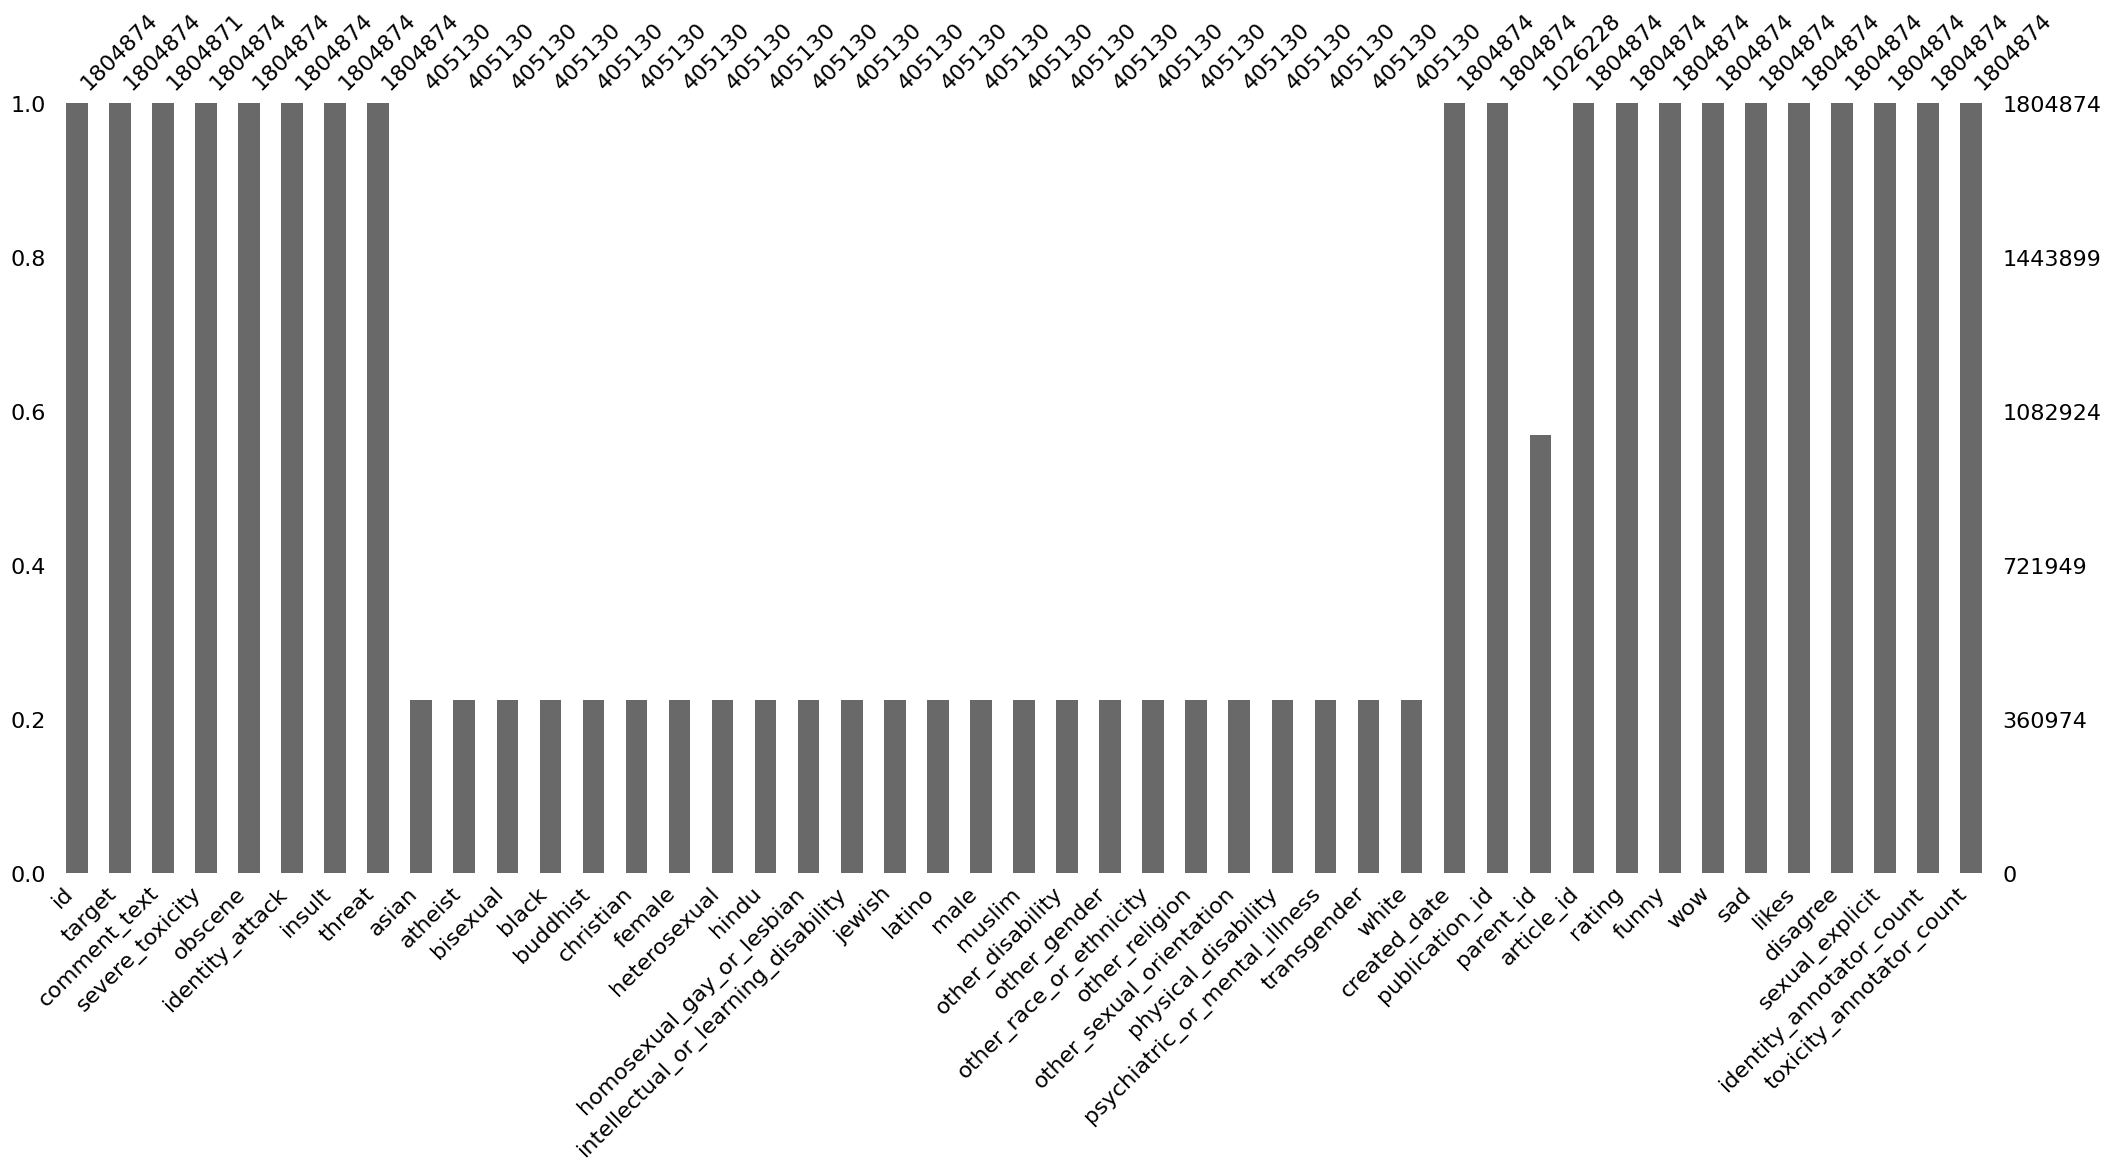

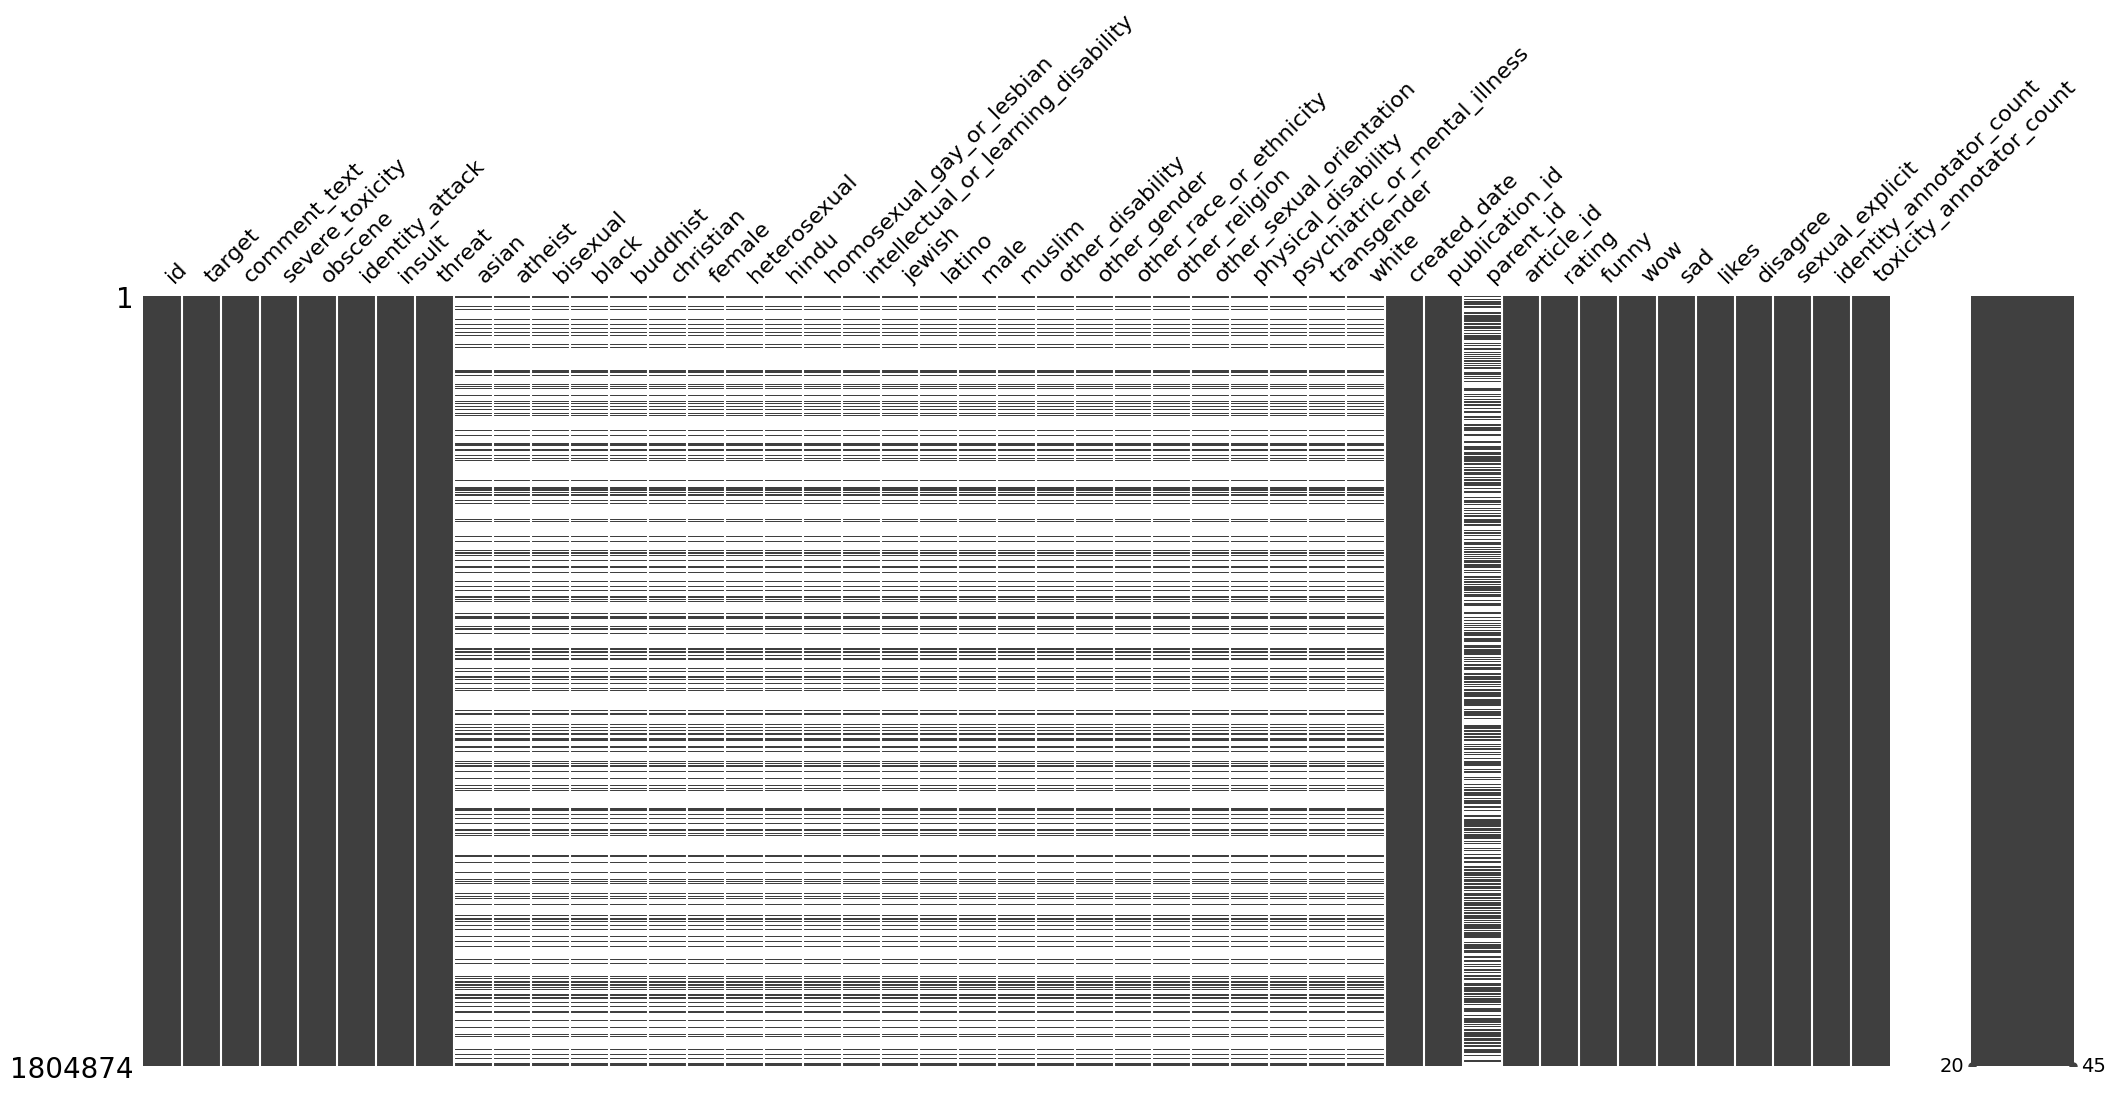

In [28]:
# overview of missing values
msno.bar(df_train)
msno.matrix(df_train)
df_train.isna().sum()

## Overview

In [24]:
# heatmap
# must get rid of columns where dtype == 'object'

'''plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df_train.corr(), dtype=np.bool_)) # mask for triangle corr, can use np.tril() for upper triangle
heatmap = sns.heatmap(df_train.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG') # if dont want triangle just delete mask=mask
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.xticks(rotation=45, ha='right')'''

"plt.figure(figsize=(16, 6))\nmask = np.triu(np.ones_like(df_train.corr(), dtype=np.bool_)) # mask for triangle corr, can use np.tril() for upper triangle\nheatmap = sns.heatmap(df_train.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG') # if dont want triangle just delete mask=mask\nheatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);\nplt.xticks(rotation=45, ha='right')"

In [27]:
#df_train[df_train["funny"] != 0].count()

df_train['wow'].nunique

<bound method IndexOpsMixin.nunique of 0          0
1          0
2          0
3          0
4          0
          ..
1804869    0
1804870    0
1804871    0
1804872    0
1804873    0
Name: wow, Length: 1804874, dtype: int64>

In [ ]:
df.describe()

In [ ]:
df_train['toxic'] = np.where(df_train['target'] >= 0.50, 1, 0)

In [ ]:
#imbalanced data
counts = df_train['toxic'].value_counts()
counts


In [ ]:
# Plotting
plt.figure(figsize=(8, 5))
plt.bar(counts.index, counts.values, color=['green', 'red'])
plt.xticks(counts.index, ['Non-Toxic', 'Toxic'])
plt.title('Distribution of Toxic vs Non-Toxic Comments')
plt.ylabel('Number of Comments')
plt.show()